# Task 6 - 03 June 2025

# **K-Nearest Neighbors (KNN) Classification**

### *Importing libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


### *Loading the dataset*

In [5]:
df = pd.read_csv("iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### *Preparing features and labels*

In [6]:
X = df.iloc[:, :2].values  
y = df.iloc[:, -1].values  

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print("Target classes:", le.classes_)


Target classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### *Normalizing the features*

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### *Train-Test split*

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### *Train KNN with different K values*

K = 1 → Accuracy: 1.00


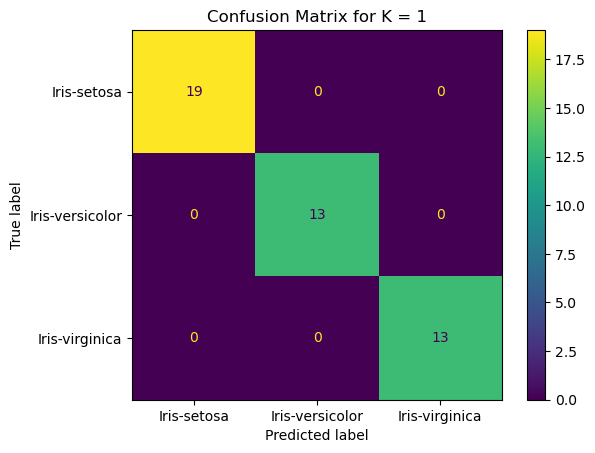

K = 3 → Accuracy: 1.00


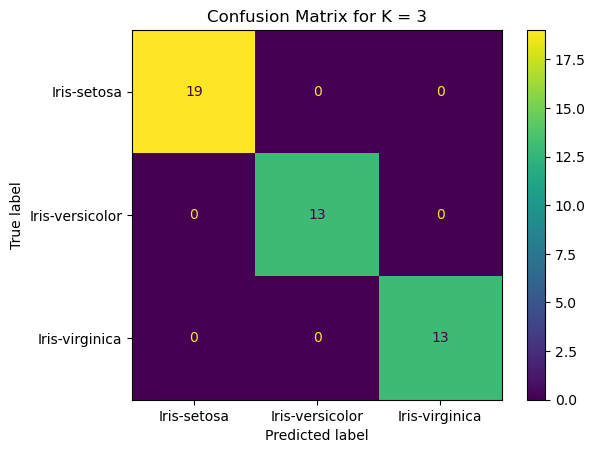

K = 5 → Accuracy: 1.00


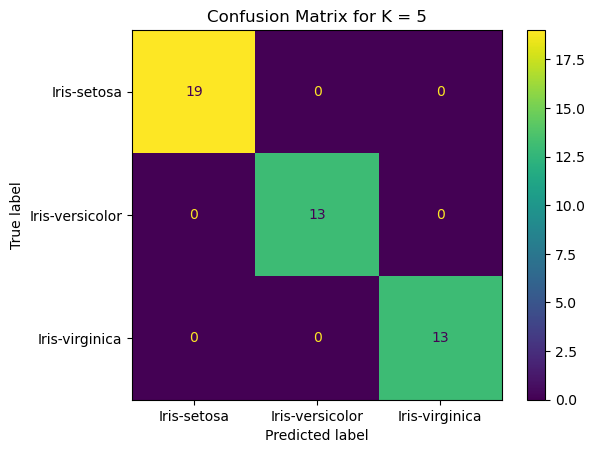

K = 7 → Accuracy: 1.00


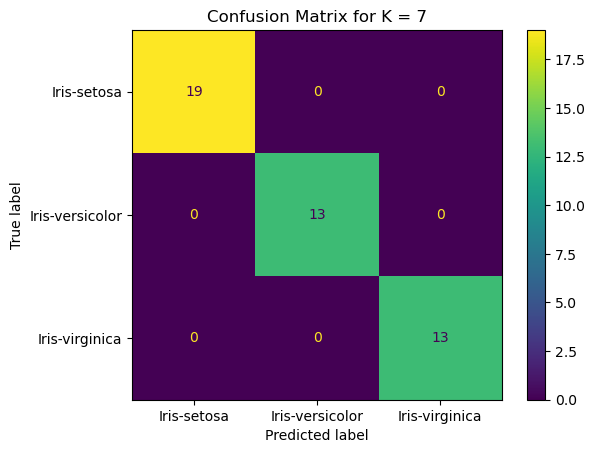

K = 9 → Accuracy: 1.00


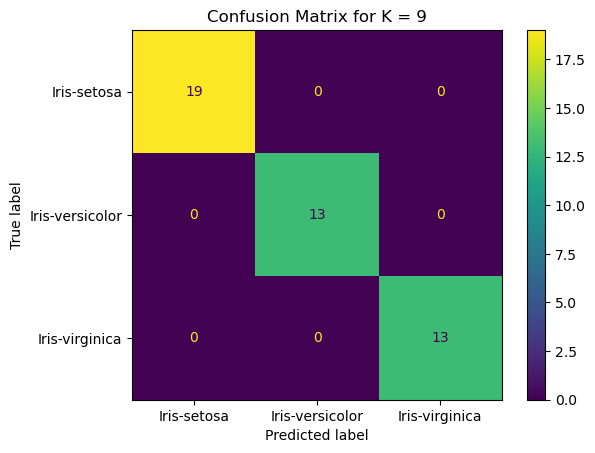

In [9]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Accuracy: {acc:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for K = {k}")
    plt.show()


### *Visualizing decision boundaries for best K, (K=3)*

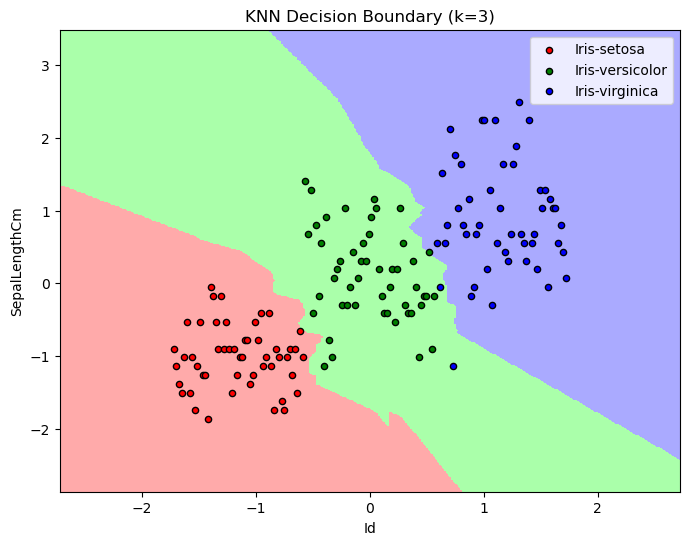

In [10]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Scatter points
for i, color in zip(range(len(le.classes_)), cmap_bold):
    idx = np.where(y == i)
    plt.scatter(X_scaled[idx, 0], X_scaled[idx, 1], c=color, label=le.classes_[i], edgecolor='k', s=20)

plt.title(f"KNN Decision Boundary (k={best_k})")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()
